<a href="https://colab.research.google.com/github/Samin-Sadaf7/QuestionAnswerGenerator/blob/main/Testing_images_for_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Document parsing and image summarization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/AI_integration_kernel'

#Document Parsing

In [1]:
!pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.6/459.6 kB 37.5 MB

In [2]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,450 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,169 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/uni

In [3]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (133 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121913 

In [4]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libimagequant0 libraqm0 mailcap mime-support python3-olefile
  tesseract-ocr-eng tesseract-ocr-osd
Suggested packages:
  python-pil-doc
The following NEW packages will be installed:
  libarchive-dev libimagequant0 libleptonica-dev libraqm0 libtesseract-dev
  mailcap mime-support python3-olefile python3-pil tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-script-latn
0 upgraded, 13 newly installed, 0 to remove and 52 not upgraded.
Need to get 40.0 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-d

In [5]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

  Preparing metadata (setup.py) ... done
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp310-cp310-linux_x86_64.whl size=169753 sha256=d4fda7a2d50a2e301cc20e35efb8b537ef65936957e0dd934b614b9e031f24fd
  Stored in directory: /root/.cache/pip/wheels/bb/fd/f3/5c231ecbbb80a1fe33204ff3021d99b54ef6daf6f8099311b8
Successfully built tesseract-ocr


In [1]:
from unstructured.partition.pdf import partition_pdf

In [2]:
res_pdf_elements =partition_pdf(
    filename ="/content/sample_anatomoy_notes.pdf",
    strategy="hi_res",
    extract_images_in_pdf=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_table_block_output_dir="extracted_data_table",
    extract_image_block_output_dir="extracted_data_image"
)

In [3]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]

for element in res_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
    Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
    Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
    Title.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
    Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
    ListItem.append(str(element))
  elif 'unstructured.documents.elements.NarrativeText' in str(type(element)):
    NarrativeText.append(str(element))

In [4]:
img =[]
for element in res_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
    img.append(str(element))

In [5]:
table=[]
for element in res_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
    table.append(str(element))

#ChromaDB vector store




In [ ]:
!pip install langchain_core

In [ ]:
!pip install langchain_openai

In [7]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

In [6]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OpenAIKey')
os.environ['GEMINI_API_KEY'] = userdata.get('GeminiKey')
os.environ['GOOGLE_API_KEY'] = userdata.get('GeminiKey')

In [8]:
prompt_text="""You are an assistant tasked with summarizing tables for retrieval. Theses summaries will be embedded and used to retreive the raw tables elements. Give a conscise summary of the table that is well optimized for retrieval. Table {element}"""

In [9]:
prompt= ChatPromptTemplate.from_template(prompt_text)

In [10]:
table_summaries=[]

In [11]:
table

[]

In [12]:
import base64
import os
from langchain_core.messages import HumanMessage

In [13]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


In [14]:
def image_summarize(img_base64, prompt):
  chat = ChatGoogleGenerativeAI(model="models/gemini-pro-vision")
  msg = chat.invoke(
      [
          HumanMessage(
              content=[
                  {"type":"text", "text":prompt},
                  {"type":"image_url",
                   "image_url": {"url":f"data:image/png;base64,{img_base64}"}
                   },
              ]
          )
      ]
  )
  return msg.content

In [29]:
def generate_img_summaries(path):
    img_base64_list = []
    image_summaries = []
    prompt = """You are an assistant tasked with summarizing images for retrieval. Theses summaries will be embedded and used to retreive the raw image. Give a conscise summary of the image that is well optimized for retrieval."""
    for filename in os.listdir(path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Adjust file extensions as needed
            image_path = os.path.join(path, filename)
            base64_image = encode_image(image_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))
    return img_base64_list, image_summaries

In [22]:
!pip install langchain-community sentence-transformers pypdf2 pypdf chromadb
!pip install google-generativeai

In [23]:
!pip install --upgrade --quiet  langchain-google-genai pillow

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [16]:
model= ChatGoogleGenerativeAI(model="gemini-pro")

In [17]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [18]:
table

[]

In [19]:
tables_summaries= summarize_chain.batch(table, {"max_concurrency":5})

In [20]:
prompt_text="""You are an assistant tasked with summarizing texts for retrieval. Theses summaries will be embedded and used to retreive the raw text elements. Give a conscise summary of the text that is well optimized for retrieval. Text {element}"""

In [21]:
text_summaries = summarize_chain.batch(Text, {"max_concurrency":5})

In [22]:
img

['Squamous Spheroid Stellate wm',
 '     ',
 '4-  Transitional epithelium, was named when it was thought to represent a   transitional  stage  between  stratified  squamous  and  stratified  columnar   epithelium.    2-Connective tissue    Typically consists mostly of fibers and ground substance, with widely   separate Fibrous Connective Tissue   a-Fibrous connective tissues are the most diverse type of connective tissue.   They are also called fibroconnective tissue or connective tissue proper.  ',
 '•Leukocytes,   white blood cells (WBCs).WBCs travel briefly in the bloodstream, then   crawl out through the capillary walls and spend most of theirtime in the   connective tissues..   •Plasma cells.   Certain lymphocytes turn into plasma cells when they detect foreign agents.   The plasma cells then synthesize disease-fighting proteins called   antibodies.   •Mast cells.  ',
 'Types of Fibrous Connective Tissue   1- Loose connective tissue   a- Areolar (AIR-ee-OH-lur) tissue   b- Reticul

In [23]:
file_path = "/content/extracted_data_image"

In [30]:
img_base64_list , generate_img_summaries = generate_img_summaries(file_path)

In [24]:
Text

['3',
 '2- simple cuboidal(square or round cells),',
 '3-',
 '4-',
 'of pericardial fluid,',
 '\\JY \\_4%',
 '4',
 '_—',
 '3.',
 'Comparison between male and female pelvis Comparison of the Male and Female Pelves',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83']

In [25]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [31]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, images_summaries, images):

  store = InMemoryStore()
  id_key = "doc_id"

  retriever = MultiVectorRetriever(
      vectorstore=vectorstore,
      docstore=store,
      id_key=id_key,
  )

  def add_documents(retriever, doc_summaries, doc_contents):

     doc_ids = [str(uuid.uuid4()) for _ in range(len(doc_contents))]

     summary_docs =[
         Document(page_content= s, metadata={"doc_id": doc_ids[i]})
         for i, s in enumerate(doc_summaries)
     ]

     retriever.vectorstore.add_documents(summary_docs)
     retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

  if text_summaries:
    add_documents(retriever, text_summaries, texts)

  if table_summaries:
    add_documents(retriever, table_summaries, table) # 'table' was changed to 'tables'

  if images_summaries:
    add_documents(retriever, images_summaries, img_base64_list) # 'img' was changed to 'images'

  return retriever # Added return statement to return the retriever object


vectorstore = Chroma(
    collection_name ="mm_rag" , embedding_function=GoogleGenerativeAIEmbeddings(model="models/embedding-001")
)

retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    table,
    generate_img_summaries,
    img_base64_list
)

In [32]:
query = "skin"

In [33]:
test = retriever_multi_vector_img.invoke(query)


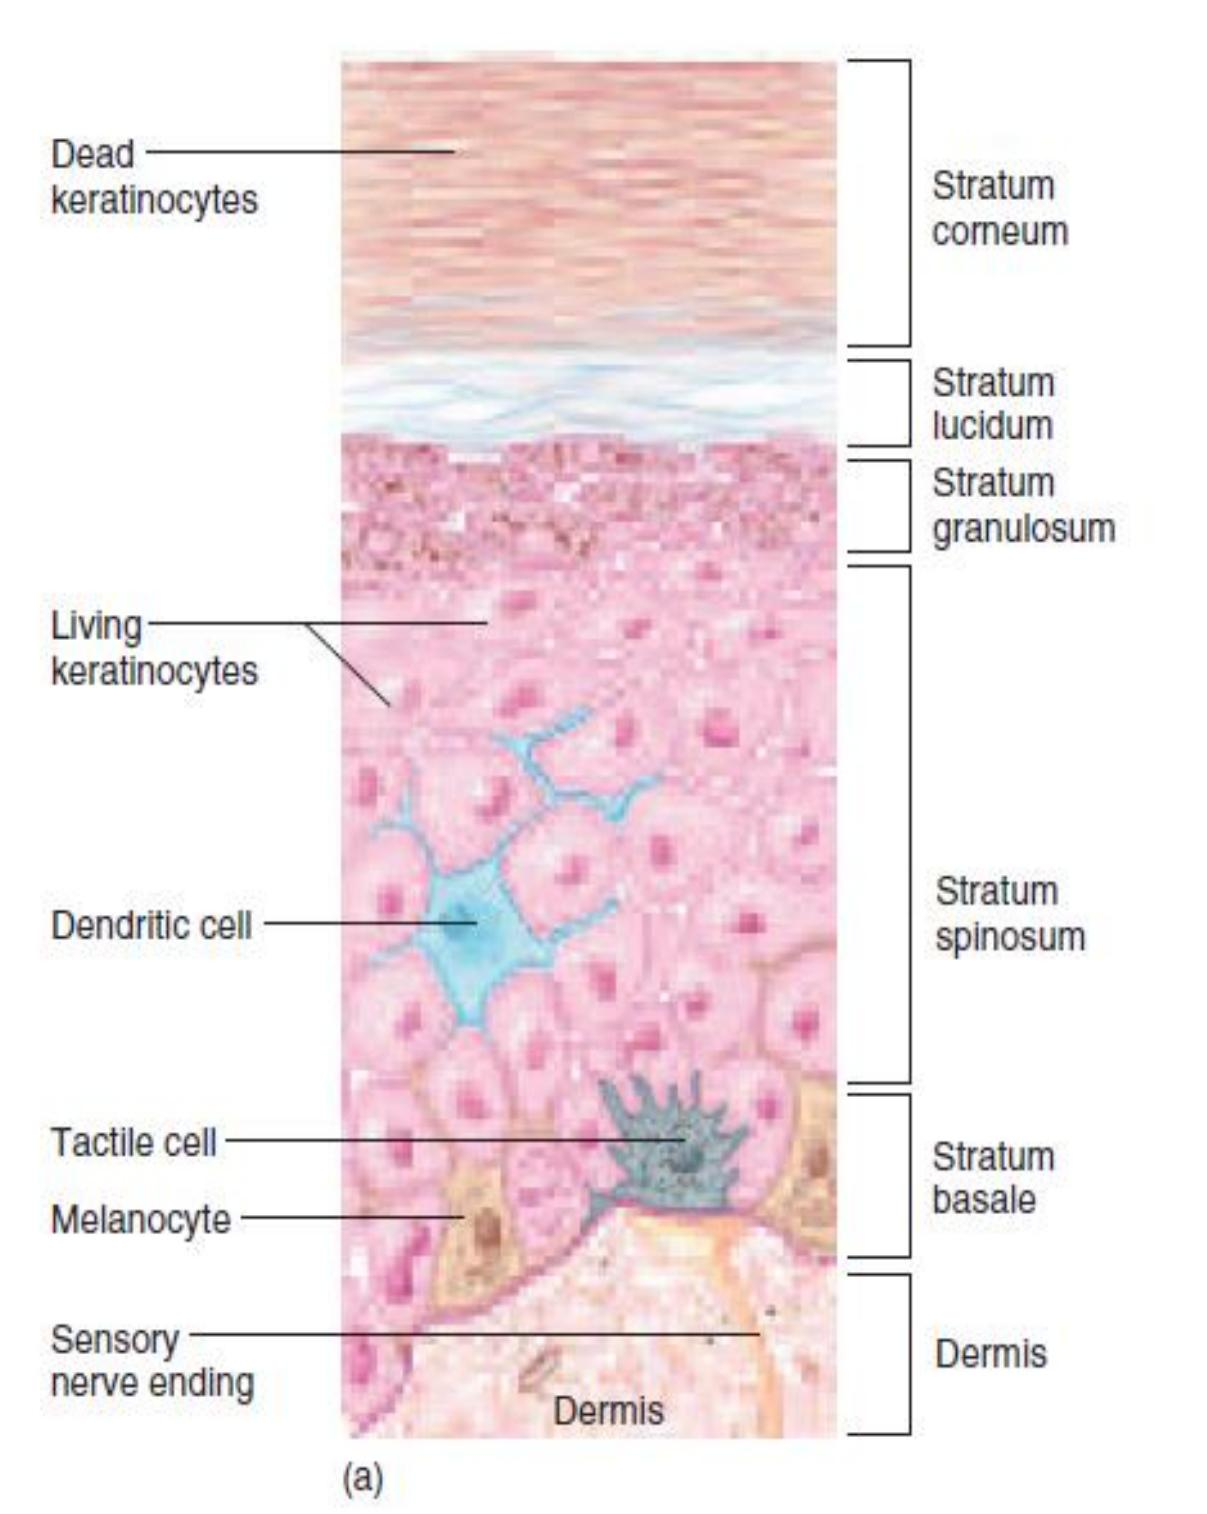


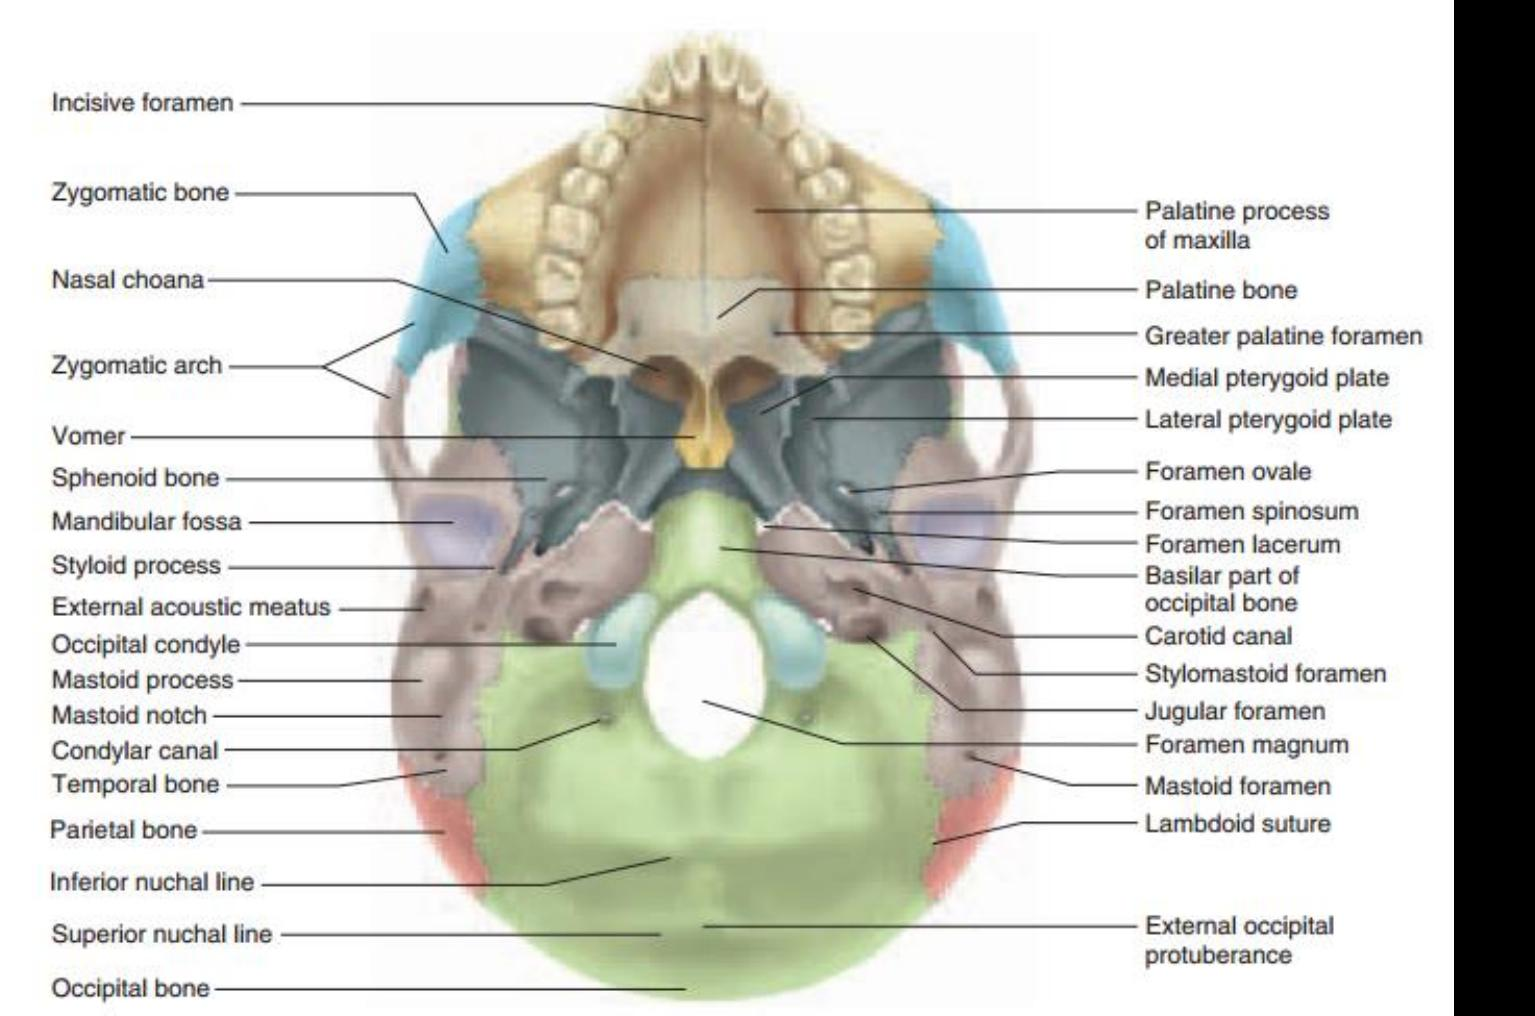


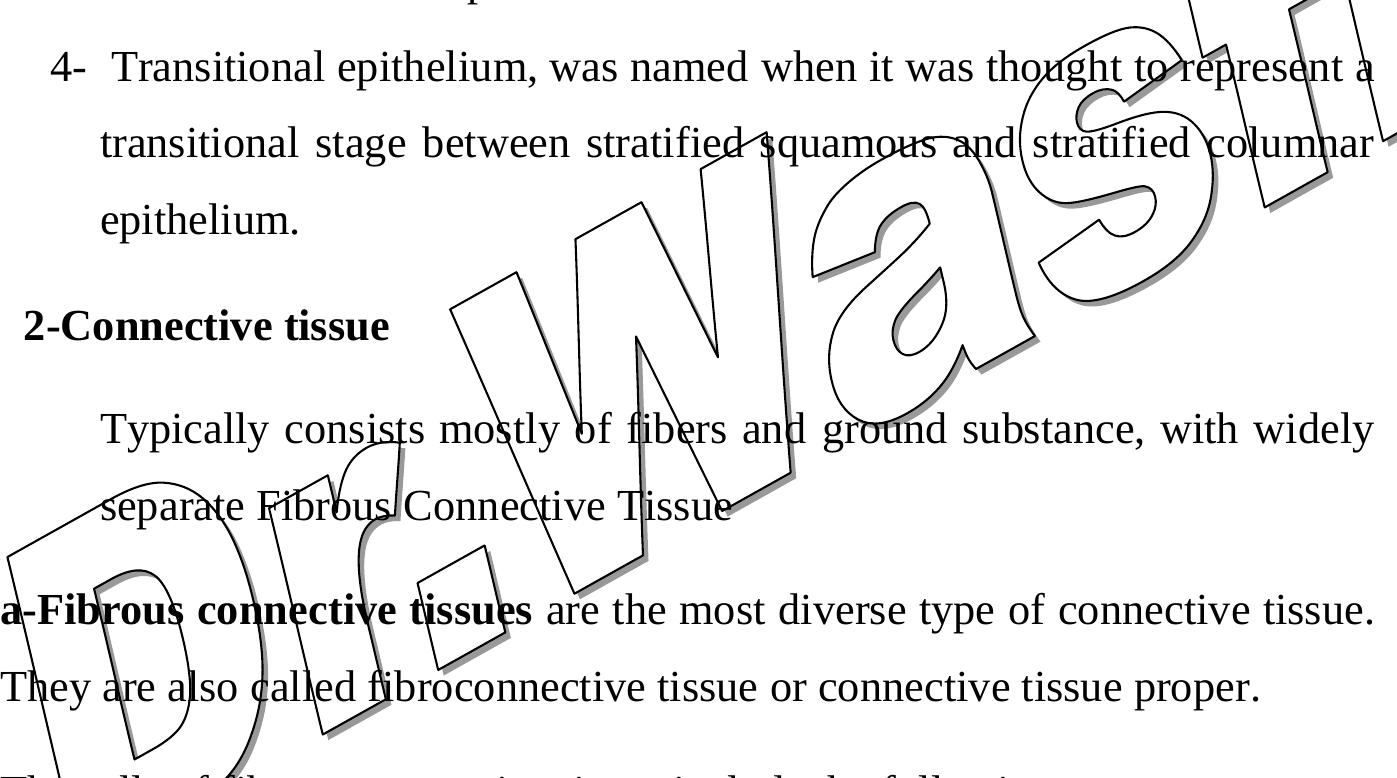


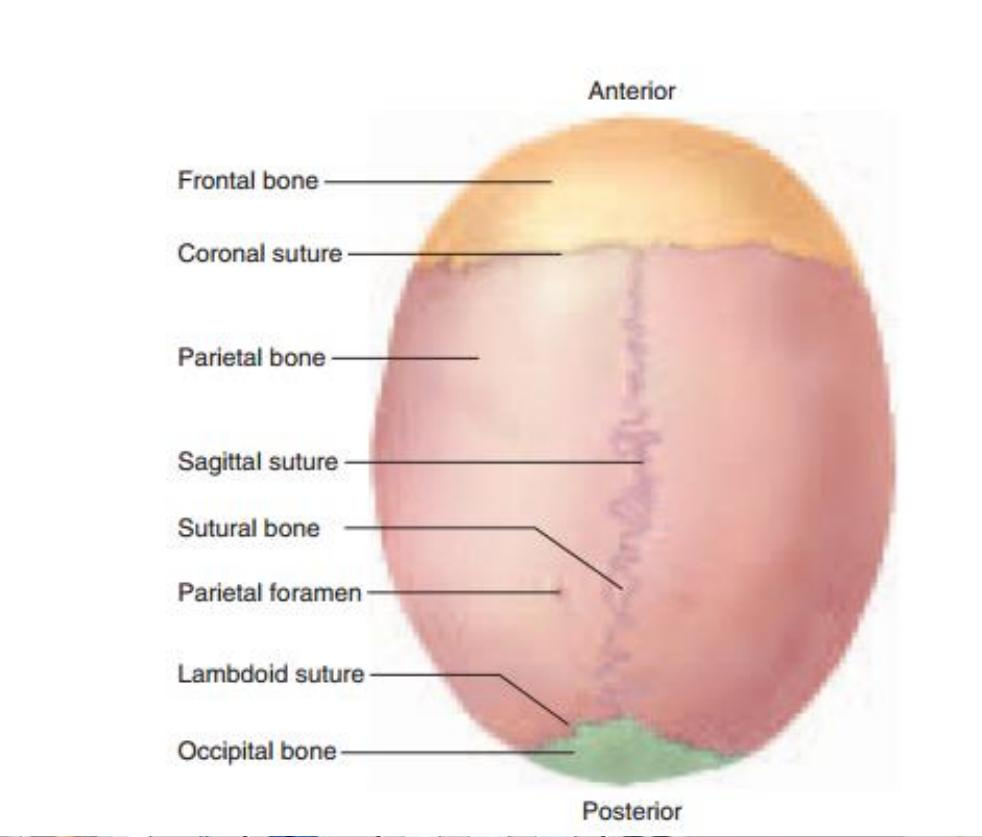

In [39]:
for t in test:
  plt_img_base64(t)

In [35]:
import io
import re

from IPython.display import display, HTML
from PIL import Image

In [36]:
def plt_img_base64(img_base64):
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))


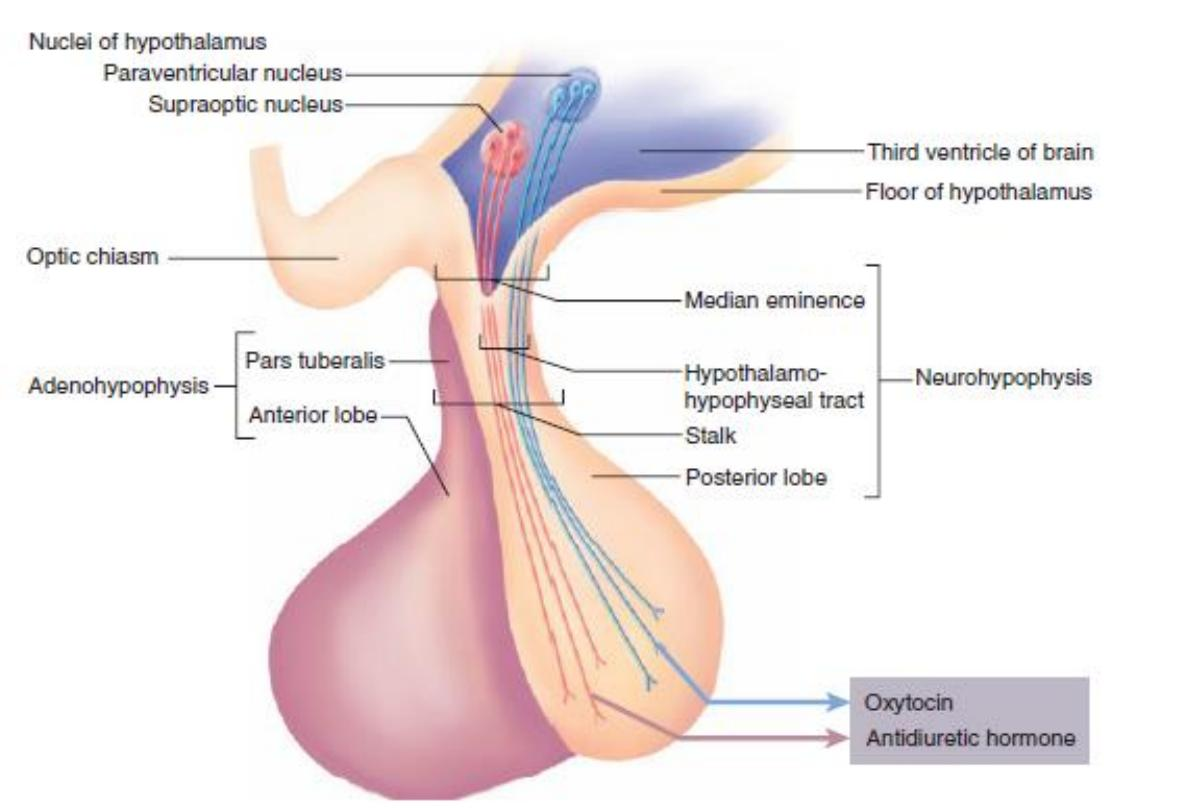

In [37]:
plt_img_base64(img_base64_list[6])

In [40]:
generate_img_summaries[6]

''

In [41]:
def looks_like_base64(sb):
    # Check if the string follows base64 encoding patterns
    return re.match(r'^[A-Za-z0-9+/]+[=]{0,2}$', sb) is not None

In [42]:
def is_image_data(b64data):
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        # Decode the first few bytes of the base64 string to check against image signatures
        header = base64.b64decode(b64data[:12])  # Decoding the first 12 bytes to cover the longest header
        for sig in image_signatures:
            if header.startswith(sig):
                return True
        return False
    except Exception as e:
        print(f"Error decoding base64 data: {e}")
        return False

In [43]:
def resize_base64_image(doc, size=(128,128)):
  image = Image.open(io.BytesIO(base64.b64decode(doc)))
  resized_image = image.resize(size)
  buffered = io.BytesIO()
  resized_image.save(buffered, format=image.format)
  return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [44]:
def split_image_text_types(docs):
  b64_images = []
  texts = []
  for doc in docs:
    if isinstance(doc, Document):
      doc = doc.page_content
    if looks_like_base64(doc) and is_image_data(doc):
      doc = resize_base64_image(doc, size =(1300,600))
      b64_images.append(doc)
    else:
      texts.append(doc)
  print(b64_images)
  print(texts)
  return {"images": b64_images,"texts": texts}


In [45]:
def img_prompt_func(data_dict):

  for img_base64 in data_dict["context"]["images"]:
      plt_img_base64(img_base64)

  formatted_texts ="\n".join(data_dict["context"]["texts"])
  messages = []
  print(formatted_texts)

  if data_dict["context"]["images"]:
    for image in data_dict["context"]["images"]:
      messages.append(
          {"type":"image_url",
           "image_url": {"url":f"data:image/jpeg;base64,{image}"}
           }
      )

  text_message = {
       "type":"text",
       "text": {
           "You are a helpful assistant.\n"
           "You will be given mixed info(s).\n"
           "Use this information to provide relevant information to the user question.  \n"
           f"User-provided question: {data_dict['question']}\n\n"
           f"{formatted_texts}"
       }
   }
  messages.append(text_message)
  return [HumanMessage(content=messages)]

In [46]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [47]:
def multi_modal_rag_chain(retriever):

  model = ChatGoogleGenerativeAI(model="gemini-pro", max_tokens=1024)


  chain = (
      {
          "context" : retriever | RunnableLambda(split_image_text_types),
          "question" : RunnablePassthrough(),
      }
      | RunnableLambda(img_prompt_func)
      | model
      | StrOutputParser()
  )

  return chain

In [48]:
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [49]:
chain_multimodal_rag

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7de470b710c0>, docstore=<langchain_core.stores.InMemoryStore object at 0x7de470b70fd0>)
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatGoogleGenerativeAI(model='models/gemini-pro', client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7de480635030>, async_client=<google.ai.generativelanguage_v1beta.services.generative_service.async_client.GenerativeServiceAsyncClient object at 0x7de480637fa0>, default_metadata=())
| StrOutputParser()

#Using LanceDB

In [ ]:
!pip install llama-index-vector-stores-lancedb
!pip install llama-index-multi-modal-llms-openai
!pip install llama-index-embeddings-clip
!pip install llama-index-readers-file
!pip install git+https://github.com/openai/CLIP.git

In [ ]:
%pip install llama-index-multi-modal-llms-gemini
%pip install llama-index-vector-stores-qdrant
%pip install llama-index-embeddings-gemini
%pip install llama-index-llms-gemini

In [ ]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

In [ ]:
!pip install llama_index
!pip install -U openai-whisper

In [229]:
!pip install lancedb
!pip install moviepy
!pip install pytube
!pip install pydub
!pip install SpeechRecognition
!pip install ffmpeg-python
!pip install soundfile
!pip install torch torchvision
!pip install matplotlib scikit-image
!pip install ftfy regex tqdm

In [50]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint
from PIL import Image
import matplotlib.pyplot as plt

In [51]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [52]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [53]:
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.embeddings.gemini import GeminiEmbedding
from llama_index.llms.gemini import Gemini
from llama_index.vector_stores.qdrant import QdrantVectorStore
from llama_index.core import Settings
from llama_index.core import StorageContext
import qdrant_client

In [54]:
with open('extracted_data_image/output.txt', 'w') as f:
  for text in generate_img_summaries:
    f.write(text + '\n')
  for text in NarrativeText:
    f.write(text + '\n')
  for text in Text:
    f.write(text + '\n')
  for text in Title:
    f.write(text + '\n')

In [55]:
document = SimpleDirectoryReader('extracted_data_image').load_data()

In [56]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

GOOGLE_API_KEY = os.environ['GEMINI_API_KEY']

Settings.embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
Settings.llm = Gemini(api_key=GOOGLE_API_KEY)

storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

index = MultiModalVectorStoreIndex.from_documents(
    document,
    storage_context=storage_context)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 56.9MiB/s]


In [57]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

In [58]:
retriever_engine = index.as_retriever(similarity_top_k=1, image_similarity_top_k=3)

In [59]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [60]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [61]:
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

In [71]:
query = "The plasma membrane and skin"
image, text = retrieve(retriever_engine, query)

**Node ID:** 16f3c11b-fb38-426a-89c6-df68ce48b8be<br>**Similarity:** 0.5816078186035156<br>**Text:** The side that faces the cytoplasm is the intracellular face of the membrane, and the side that faces outward is the extracellular face.
The plasma membrane—an oily film of lipids with diverse prote...<br>

In [72]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break

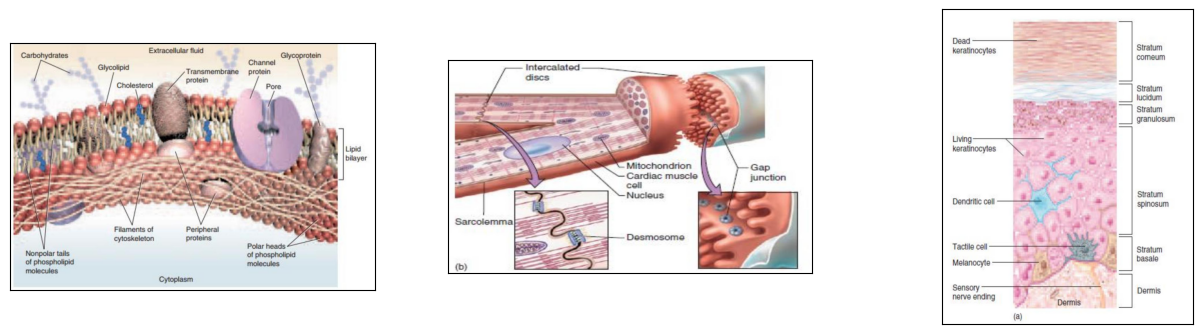

In [73]:
plot_images(image)

In [74]:
text

['The side that faces the cytoplasm is the intracellular face of the membrane, and the side that faces outward is the extracellular face.\nThe plasma membrane—an oily film of lipids with diverse proteins embedded in it. Typically about 98% of the molecules in the membrane are lipids, and about 75% of the lipids are phospholipids. These amphiphilic molecules arrange themselves into a bilayer, with their hydrophilic phosphate-containing heads facing the water on each side of the membrane and their hydrophobic tails directed toward the center of the membrane.\n1- Integral (transmembrane) proteins, pass through the membrane. They have hydrophilic regions, most integral proteins are glycoproteins, which are conjugated with oligosaccharides on the extracellular side of the membrane.\n2-nPeripheral proteinsdo not protrude into the phospholipid layer but adhere to the intracellular face of the membrane.\nMembrane proteins include the following:\n•Receptors The chemical signals by which cells c

In [75]:
context_str = "".join(text)

In [76]:
image_documents = SimpleDirectoryReader( input_files=image).load_data()

In [77]:
qa_tmpl_str=(
    "Based on the provided information, including relevant images and retrieved context from the book pdf, \
     generate viva questions on the topic without any additional prior knowledge. Viva Questions are questions which can be answered in 1-2 Sentences\n"

    "---------------------\n"
    "Context: {context_str}\n"

    "---------------------\n"
    "Topic: {query_str}\n"
    "Questions: "
)

In [78]:
complete_response = gemini_pro.complete(
    prompt= qa_tmpl_str.format(
        context_str=context_str,
        query_str=query
    ),
    image_documents=image_documents,
)

In [79]:
pprint(complete_response.text)

(' 1- What are the two main types of membrane proteins?\n'
 '2- What is the function of the glycocalyx?\n'
 '3- What are the three main layers of the skin?\n'
 '4- What are the two main types of cells in the epidermis?\n'
 '5- What is the function of the dermis?')
